In [1]:
import os
os.chdir("../../../scnet/")

In [2]:
import scanpy as sc
import seaborn as sns

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
base_path = "/home/mohsen/data/tabula_senis_muris/latents/"

In [4]:
os.listdir(base_path)

['all.h5ad', 'muris_with_knn.h5ad']

In [5]:
path_to_save = "./results/integration/tabula_senis_muris/"

In [6]:
sc.set_figure_params(dpi=100, frameon=False)

# Integrated data

In [7]:
filename = 'all.h5ad'
filepath = os.path.join(base_path, filename)
latent_adata = sc.read(filepath)
sc.settings.figdir = path_to_save

In [8]:
latent_adata.obs['Tech'].value_counts()

Tabula Senis    264287
Tabula Muris     90120
Name: Tech, dtype: int64

In [9]:
latent_adata.obs['Tech'].replace('Tabula Senis', 'Tabula Senis (reference)', inplace=True)
latent_adata.obs['Tech'].replace('Tabula Muris', 'Tabula Muris (query)', inplace=True)

In [14]:
sc.pl.palettes.godsnot_102[6:8]

['#A30059', '#FFDBE5']

In [22]:
latent_adata.uns['Tech_colors'] = ['#A30059', '#FFDBE5',]

In [18]:
sc.pp.subsample(latent_adata, fraction=1.0, random_state=100)

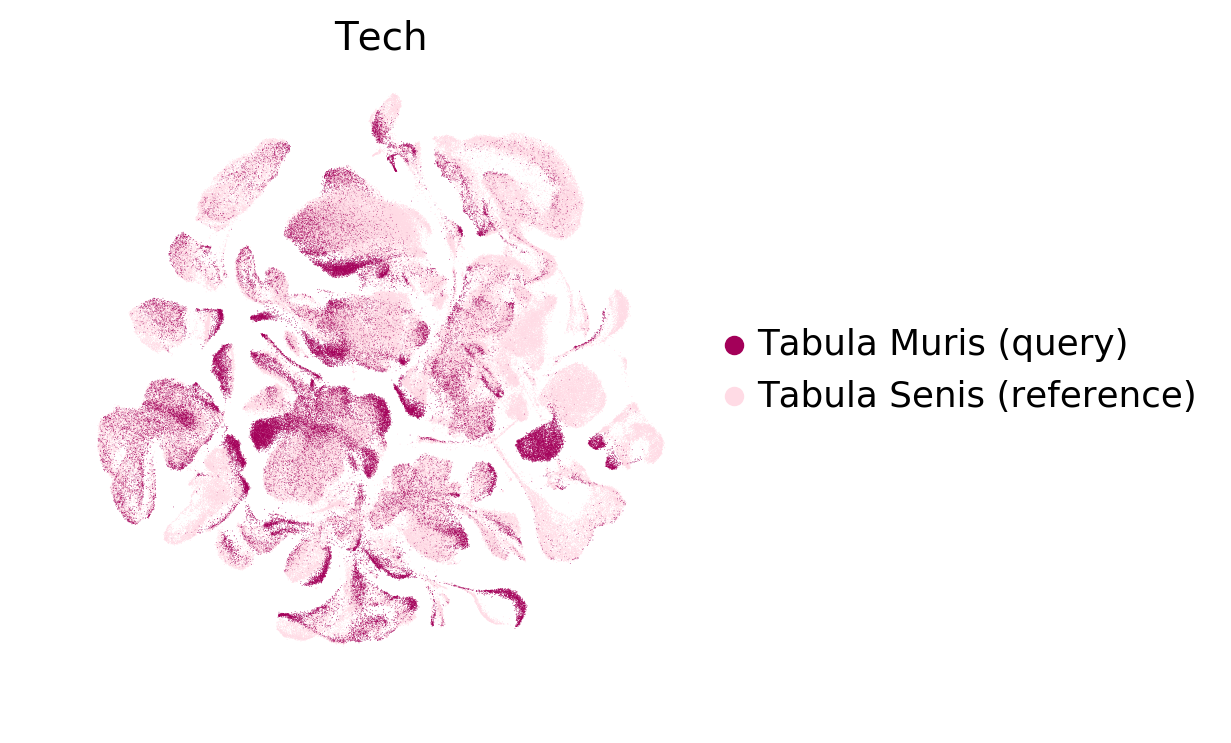

In [39]:
label_key = 'Tech'
palette = sc.pl.palettes.godsnot_102[6:]
# sc.pl.umap(latent_adata, color=label_key, palette=palette,
#            save=f'_integrated_{label_key}.pdf', show=False, legend_loc=None, title="")
sc.pl.umap(latent_adata, color=label_key, palette=palette,
           groups=['Tabula Muris (query)', 'Tabula Senis (reference)'],
           save=f'_integrated_{label_key}_legend.pdf', show=True)

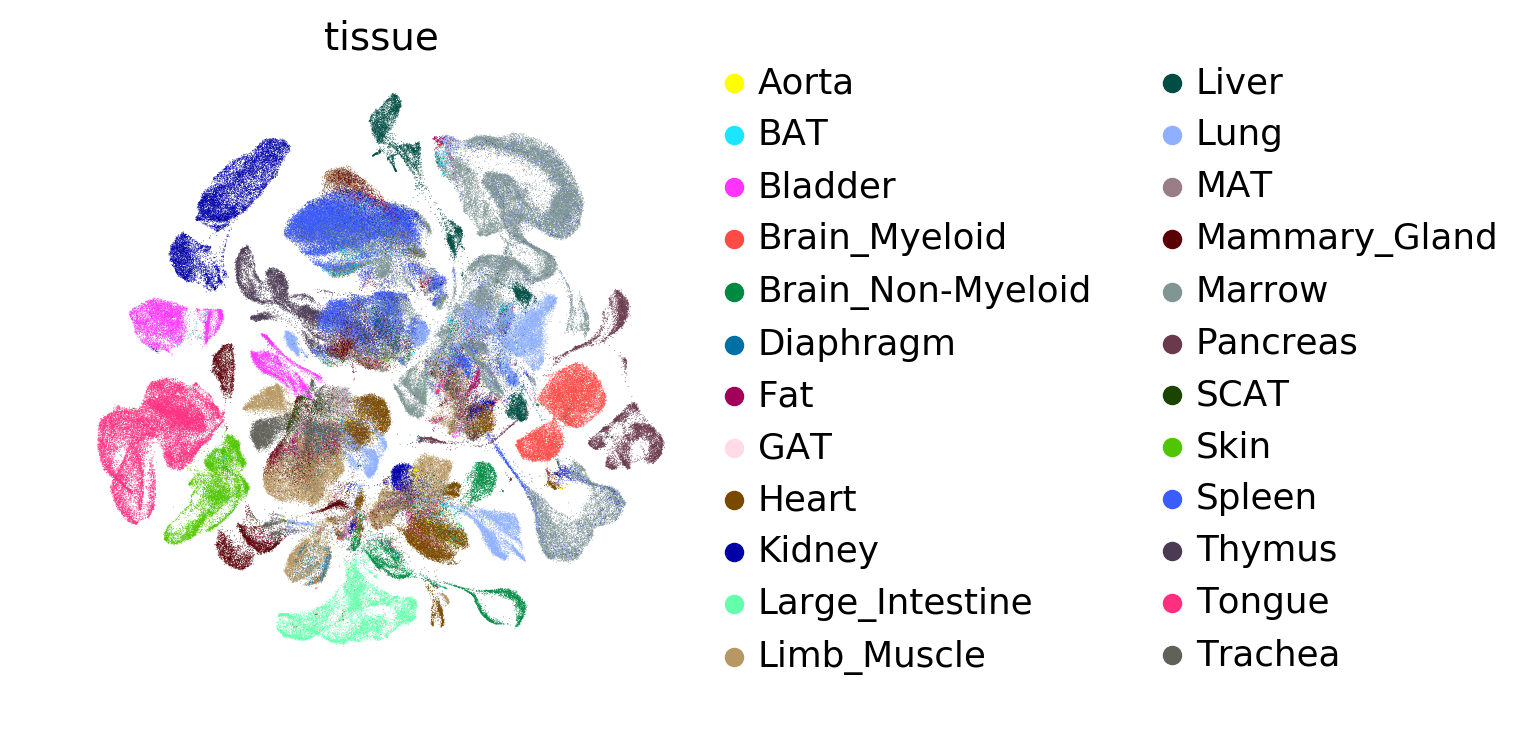

In [29]:
label_key = 'tissue'
palette = sc.pl.palettes.godsnot_102
sc.pl.umap(latent_adata, color=label_key, palette=palette,
           save=f'_integrated_{label_key}.pdf', show=False, legend_loc=None, title="")
sc.pl.umap(latent_adata, color=label_key, palette=palette,
           save=f'_integrated_{label_key}_legend.pdf', show=True)

In [ ]:
label_key = 'method_age'
sc.pl.umap(latent_adata, color=label_key, palette=palette,
           save=f'_integrated_{label_key}.pdf', show=False, legend_loc=None, title="")
sc.pl.umap(latent_adata, color=label_key, palette=palette,
           save=f'_integrated_{label_key}_legend.pdf', show=True)

In [28]:
train_latent = latent_adata[latent_adata.obs['Tech'] == 'Tabula Senis (reference)']
valid_latent = latent_adata[latent_adata.obs['Tech'] == 'Tabula Muris (query)']

In [33]:
import scnet as sn

In [34]:
sn.ann.weighted_knn(train_latent, valid_latent, 'cell_ontology_class', 20, 0.5, True)

Weighted KNN with n_neighbors = 20 and threshold = 0.5 ... 

Trying to set attribute `.obs` of view, copying.


finished!
Number of correctly classified samples: 68919
Number of misclassified samples: 15282
Number of samples classified as unknown: 5919


In [35]:
valid_latent

AnnData object with n_obs × n_vars = 90120 × 32 
    obs: 'FACS.selection', 'Tech', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'method_age', 'method_tissue', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'uncertainty', 'pred_cell_ontology_class', 'evaluation'
    uns: 'Tech_colors', 'age_colors', 'method_age_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'X_umap'

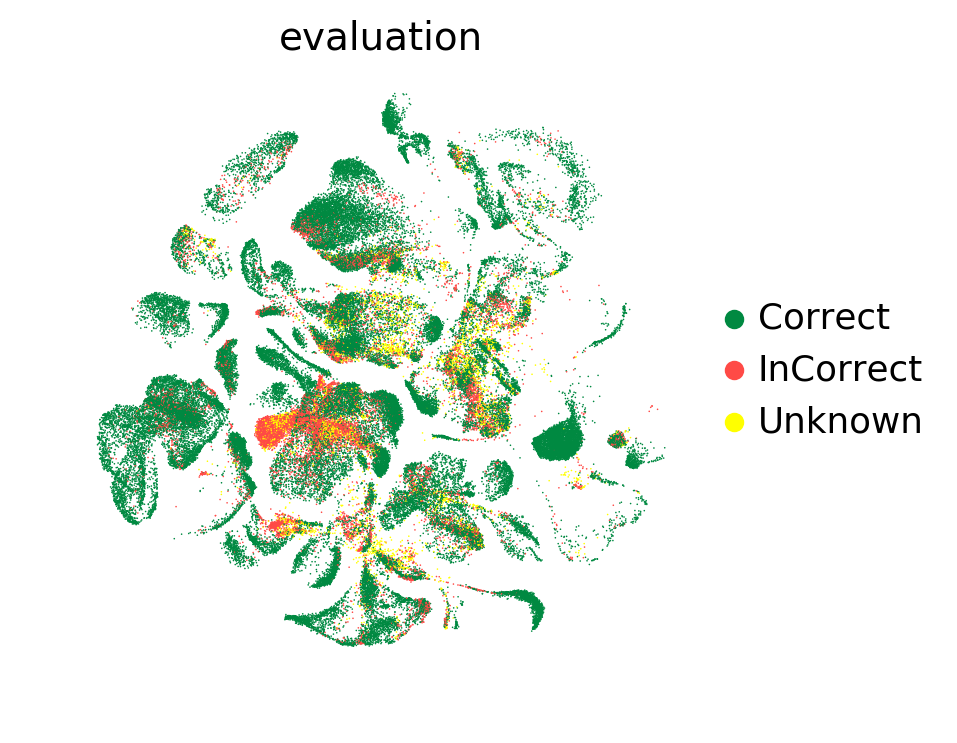

In [37]:
label_key = 'evaluation'
palette = [sc.pl.palettes.godsnot_102[4], sc.pl.palettes.godsnot_102[3], sc.pl.palettes.godsnot_102[0]]
sc.pl.umap(valid_latent, color=label_key, palette=palette,
           save=f'_muris_{label_key}.pdf', show=False, legend_loc=None, title="")
sc.pl.umap(valid_latent, color=label_key, palette=palette,
           save=f'_muris_{label_key}_legend.pdf', show=True)